In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

In [4]:
file_path = "../datasets/spam_ham_dataset.parquet"
df = pd.read_parquet(file_path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [5]:
X = df["text"]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)
y = df.loc[:, "label_num"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(C=1000, max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
residuals = y_test - y_pred

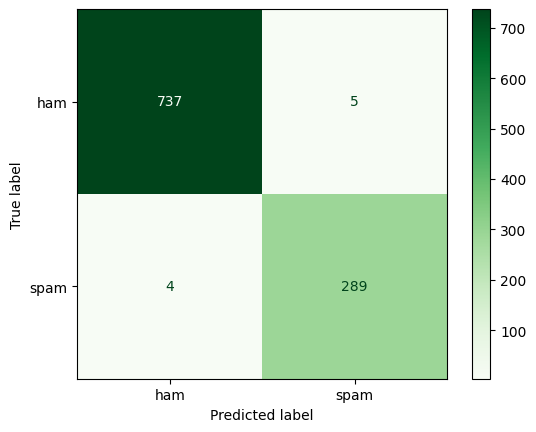

[[737   5]
 [  4 289]]
Precision: 0.983
Recall: 0.986
F1 Score: 0.985
Accuracy: 0.991


In [6]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["ham", "spam"])
disp.plot(cmap=plt.cm.Greens)
plt.show()

print(cm)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Accuracy: {accuracy:.3f}")

In [7]:
spam = """
Get your free trial of our new app now!
"""

ham = """
  I'm going to the gym today. Best regards: Diego
"""

X_test = vectorizer.transform([spam, ham])
y_pred = model.predict(X_test)

p = model.predict_proba(X_test)

print(y_pred)
print(p)


[1 1]
[[7.30621749e-06 9.99992694e-01]
 [6.05327500e-02 9.39467250e-01]]
